PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
forest = pd.read_csv("forestfires.csv")
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [ ]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

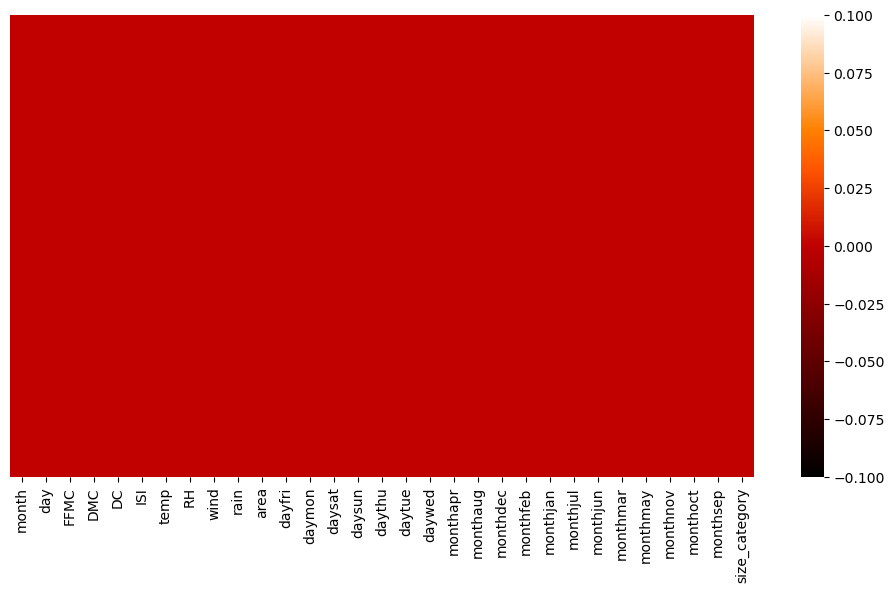

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(forest.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
forest.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

In [ ]:
forest[forest.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [ ]:
forest.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC       0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC        0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI       0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp      0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH       -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind     -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain      0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area      0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri    0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon   -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat   -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun   -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu    0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue    0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed    0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug  0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul  0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep  0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.030409  0.052280  0.040998  0.020889  ... -0.136614 -0.281054   
DMC      -0.104563  0.071017  0.076932 -0.011152  ... -0.177044 -0.319691   
DC       -0.202856  0.033772  0.051542 -0.001642  ... -0.106347 -0.402201   
ISI       0.104834  0.062132  0.008429  0.051599  ... -0.162761 -0.250494   
temp     -0.227754  0.067911  0.099173 -0.077766  ... -0.329774 -0.319901   
RH        0.070721  0.094343 -0.074554  0.069599  ... -0.047670  0.141593   
wind      1.000000  0.059332  0.012623  0.121056  ...  0.270919 -0.028820   
rain      0.059332  1.000000 -0.006511 -0.001723  ... -0.009262 -0.013961   
area      0.012623 -0.006511  1.000000 -0.052390  ...  0.000706 -0.021205   
dayfri    0.121056 -0.001723 -0.052390  1.000000  ... -0.018868  0.047592   
daymon   -0.062712 -0.028473 -0.022178 -0.182056  ...  0.113829  0.002649   
daysat   -0.068421 -0.030252  0.087647 -0.193432  ... -0.058793  0.021400   
daysun    0.025971 -0.015749 -0.020657 -0.210075  ... -0.025435  0.007987   
daythu   -0.055820 -0.025236  0.020685 -0.161357  ... -0.002816 -0.042571   
daytue    0.052331  0.127243 -0.001002 -0.165896  ... -0.005158 -0.014599   
daywed   -0.022181 -0.019189 -0.011046 -0.150484  ...  0.003068 -0.035839   
monthapr  0.048864 -0.009262 -0.008589 -0.018868  ... -0.018000 -0.027133   
monthaug  0.027413  0.088572 -0.000948 -0.100652  ... -0.098386 -0.148305   
monthdec  0.270919 -0.009262  0.000706 -0.018868  ...  1.000000 -0.027133   
monthfeb -0.028820 -0.013961 -0.021205  0.047592  ... -0.027133  1.000000   
monthjan -0.070217 -0.004336 -0.012737 -0.027723  ... -0.008427 -0.012702   
monthjul -0.039880 -0.012411  0.005566 -0.048598  ... -0.034750 -0.052381   
monthjun  0.010124 -0.012437 -0.019083 -0.018562  ... -0.024170 -0.036433   
monthmar  0.181610 -0.019189 -0.048394  0.041050  ... -0.045740 -0.068947   


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

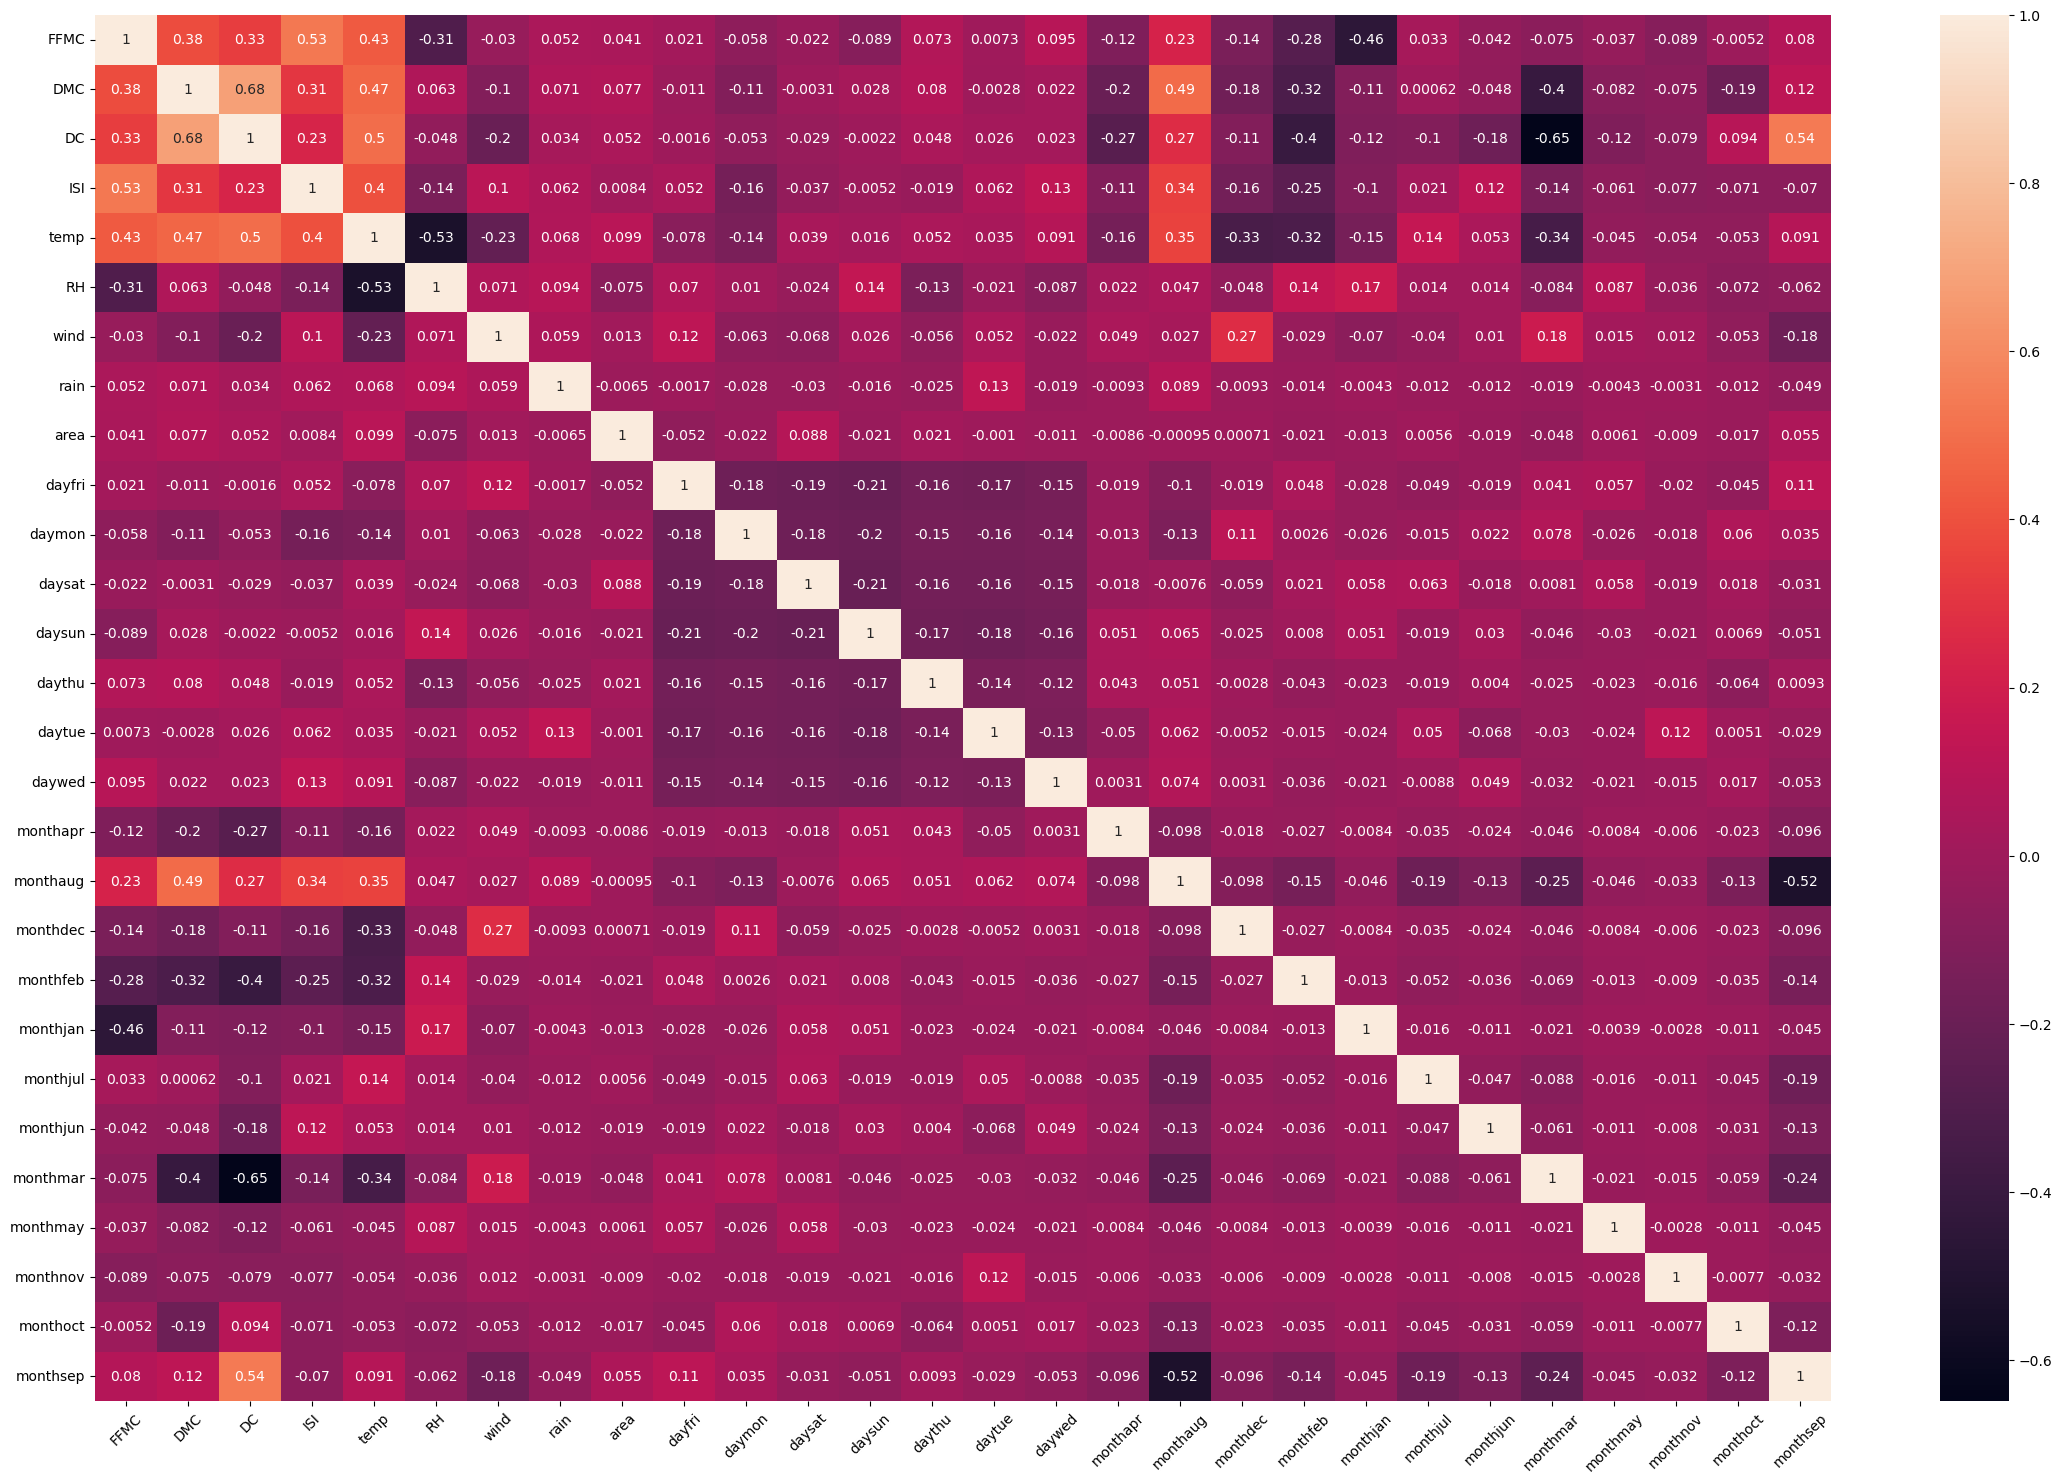

In [ ]:
fig= plt.figure(figsize=(28, 18))
sns.heatmap(forest.corr(), annot=True);
plt.xticks(rotation=45)

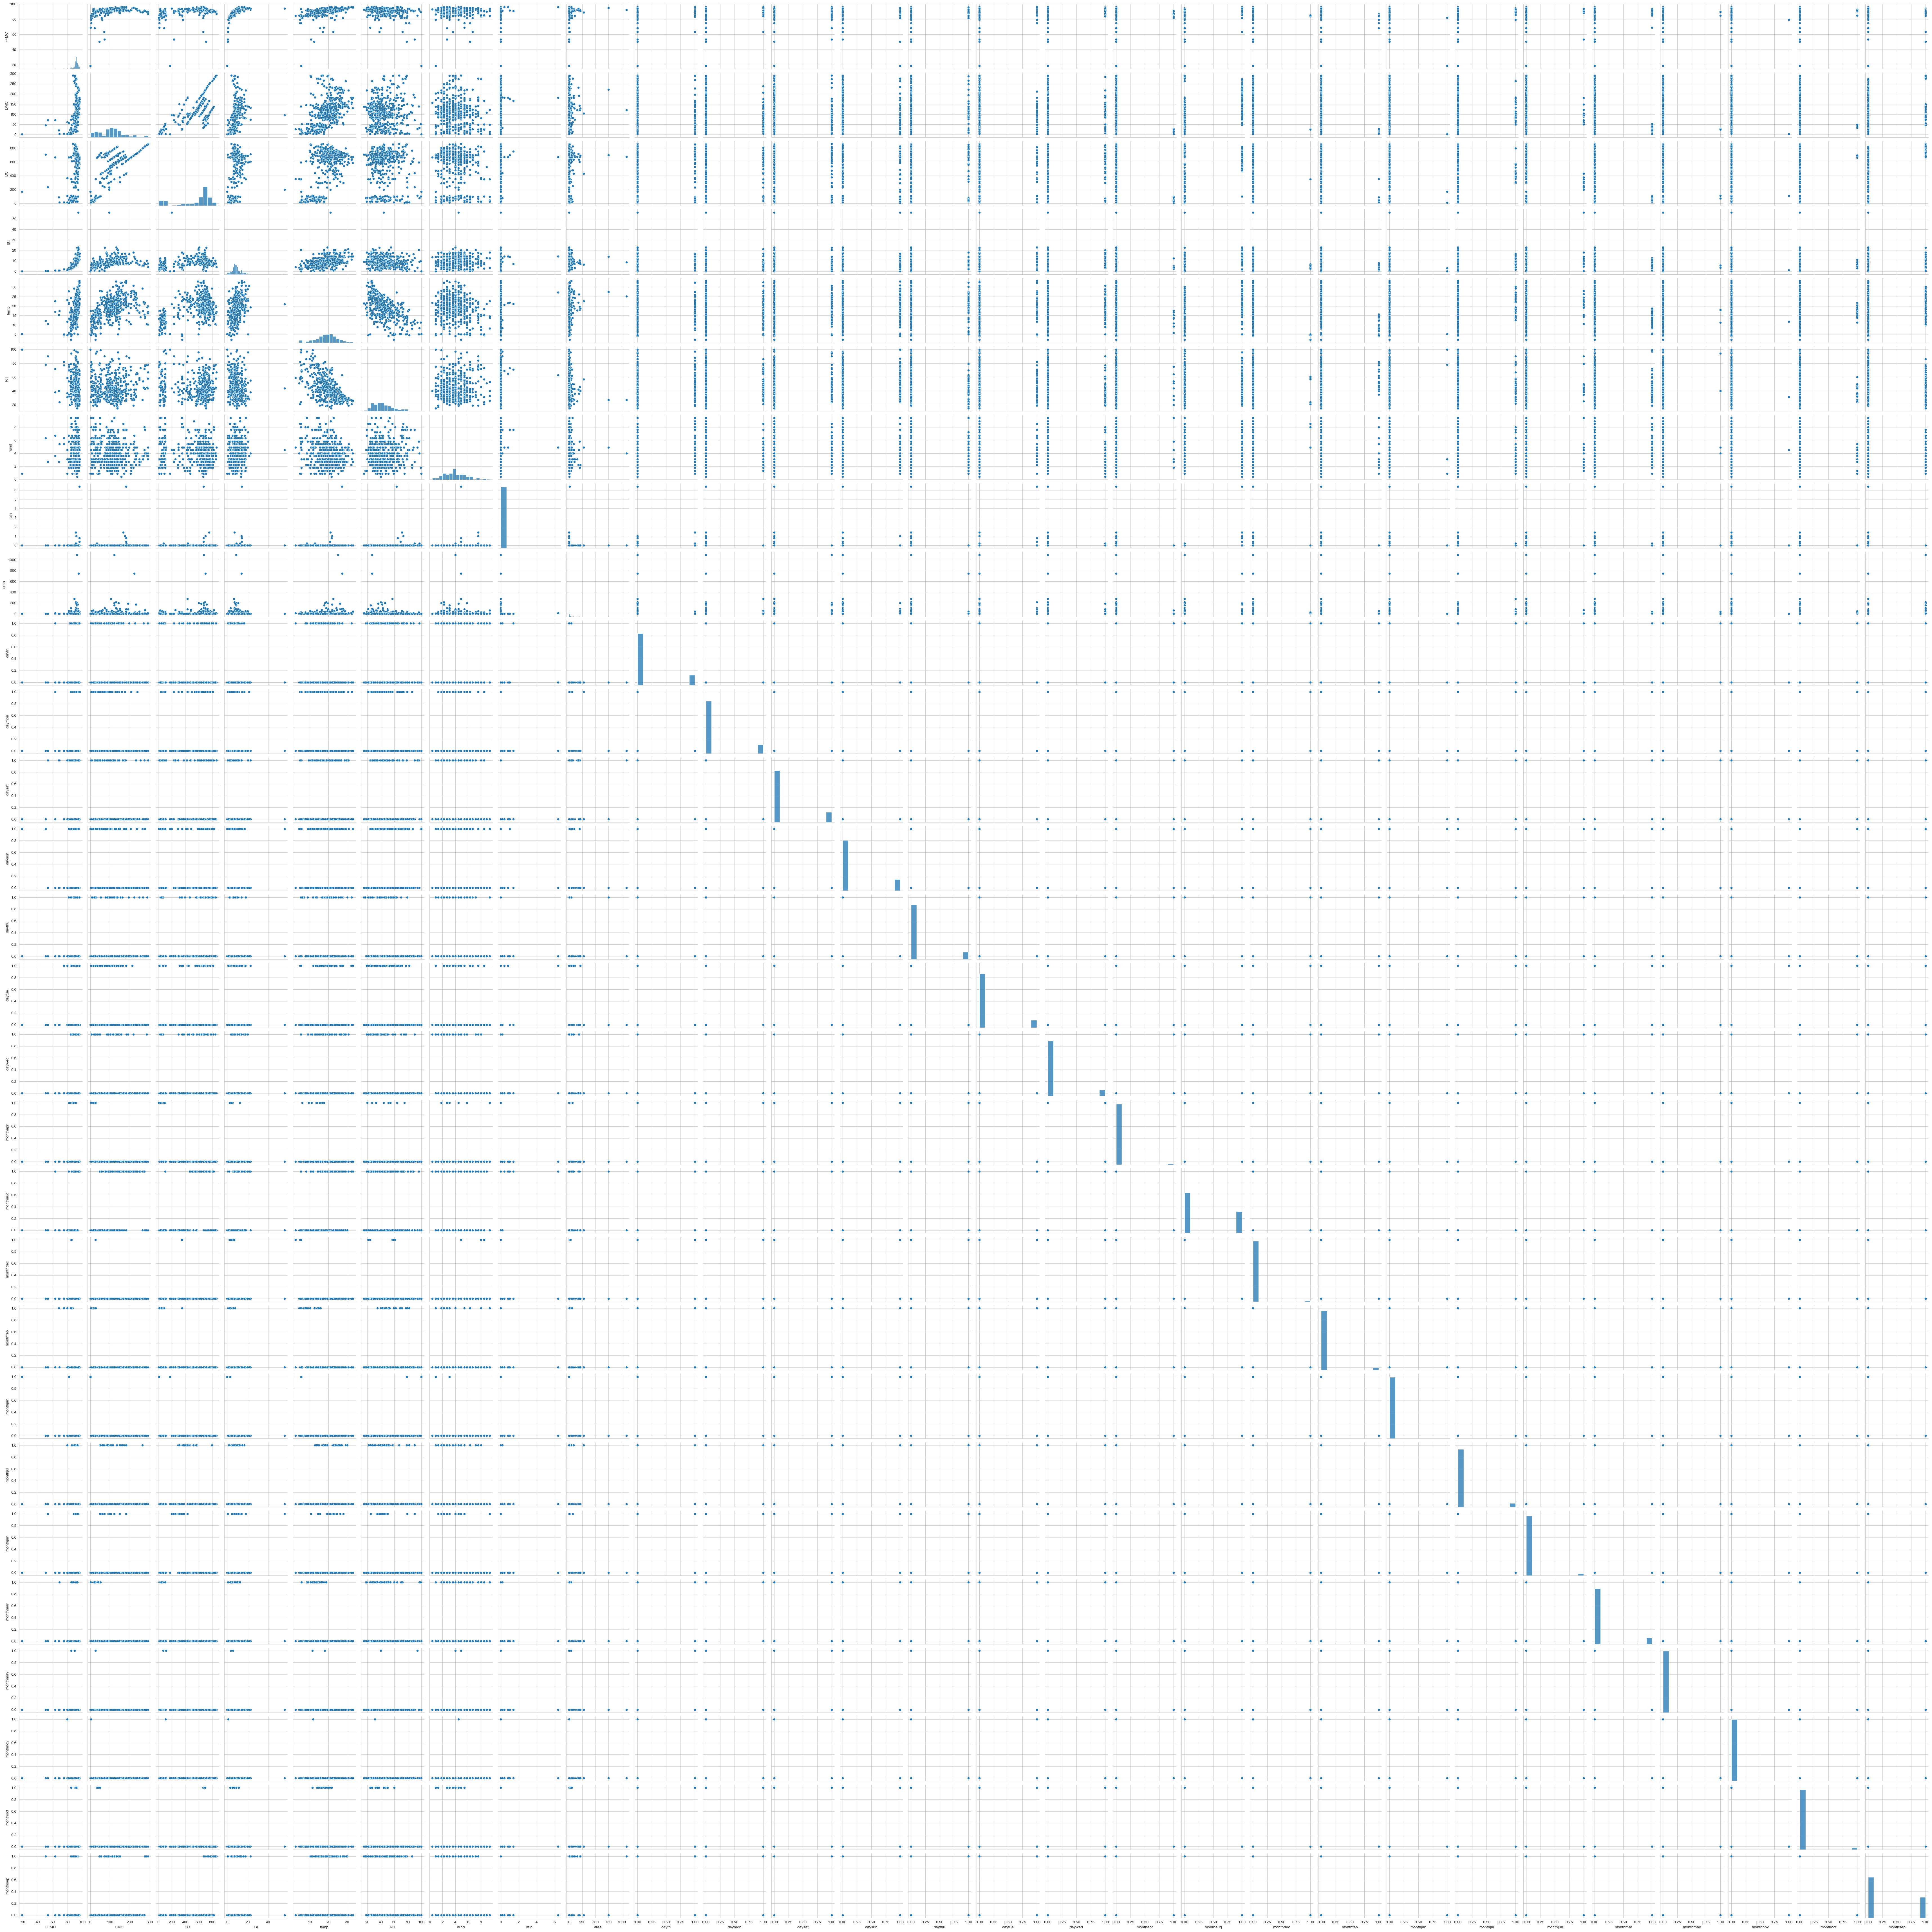

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(forest[numerical_feature])
plt.show()

In [ ]:
numerical_features = forest.describe(include=["int64", "float"]).columns

print(list(numerical_features))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(forest[feature].unique())<25]
print(list(discrete_feature))

['wind', 'rain', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(list(continuous_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']


In [ ]:
categorical = [var for var in forest.columns if forest[var].dtype=='O']
print(list(categorical))

['month', 'day', 'size_category']


In [ ]:
for var in categorical: 
    
    print(forest[var].value_counts())

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64
small    371
large    138
Name: size_category, dtype: int64


In [ ]:
for var in categorical:
    
    print(var, ' contains ', len(forest[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


['month', 'day', 'size_category']


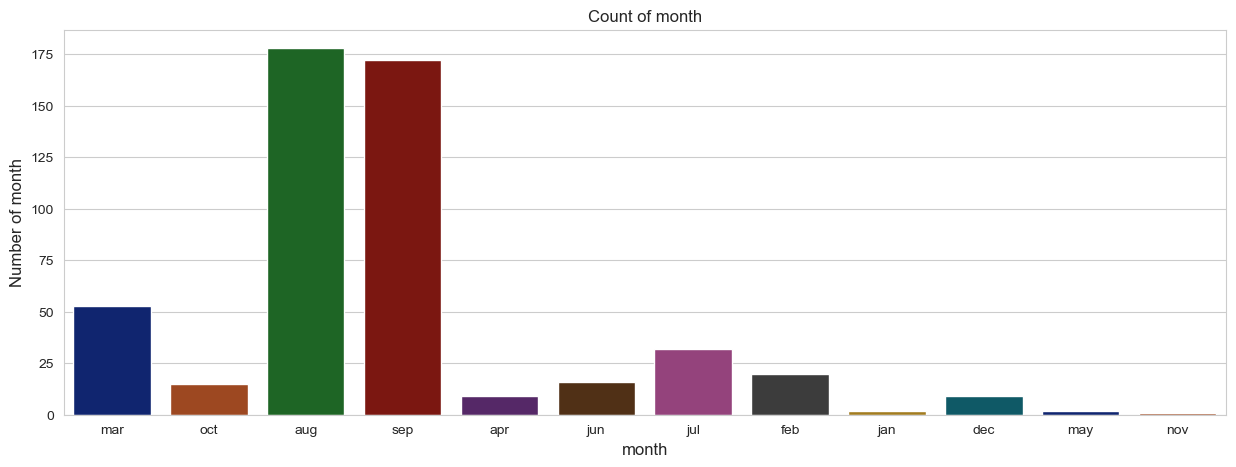

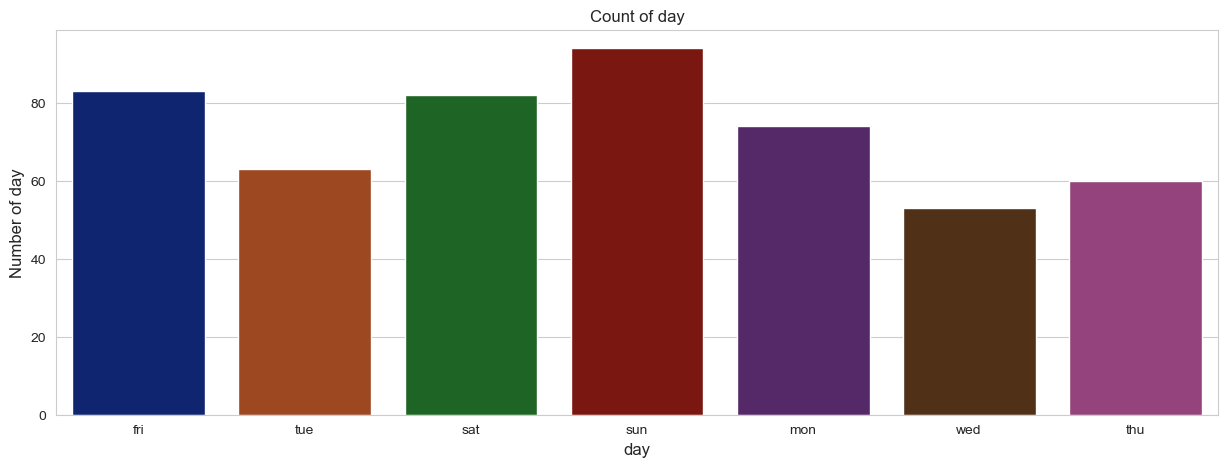

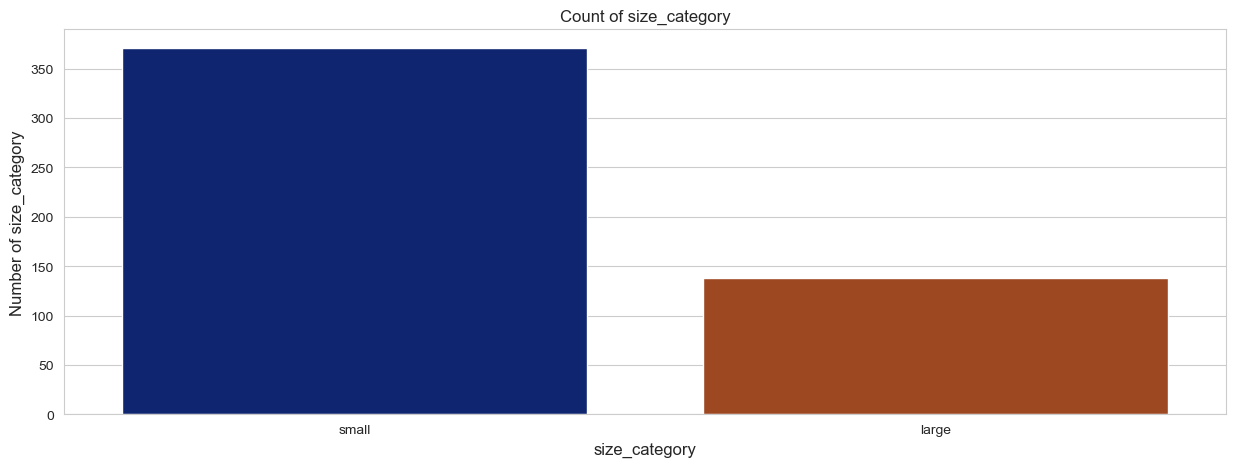

In [ ]:
print(categorical)
for idx, column in enumerate(categorical):
    plt.figure(figsize=(15, 5))
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);
 

    plt.title("Count of "+ column)
    sns.countplot(data=forest, x=column,palette = "dark")
  
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

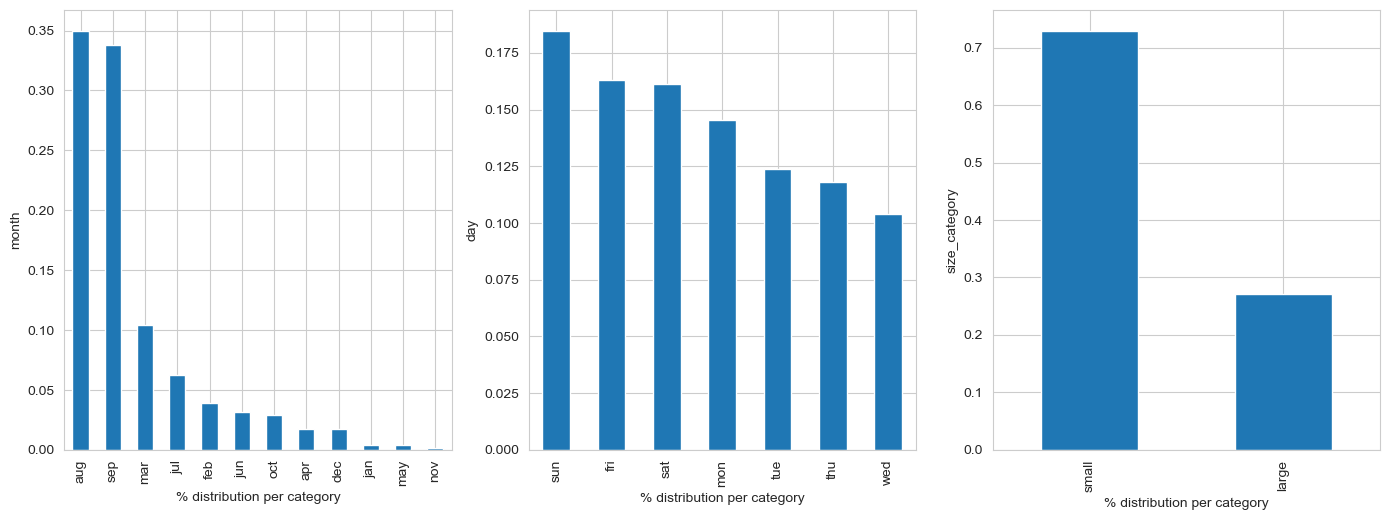

In [ ]:
plt.figure(figsize=(14,15))
for i,col in enumerate(categorical,1):
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [ ]:
forest_1= forest.iloc[:,2:30]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(forest_1)
forest_norm = sc.transform(forest_1)
forest_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(forest_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  1.30619034e-14, -1.63267504e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02,  4.68082711e-15, -4.51925684e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  4.39226511e-15, -2.00039593e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01,  3.29069057e-17,  3.06608857e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.35070622e-16,  1.08857027e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  1.24763181e-16,  7.68823392e-17]])

In [ ]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 2.12618672e-33])

In [ ]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

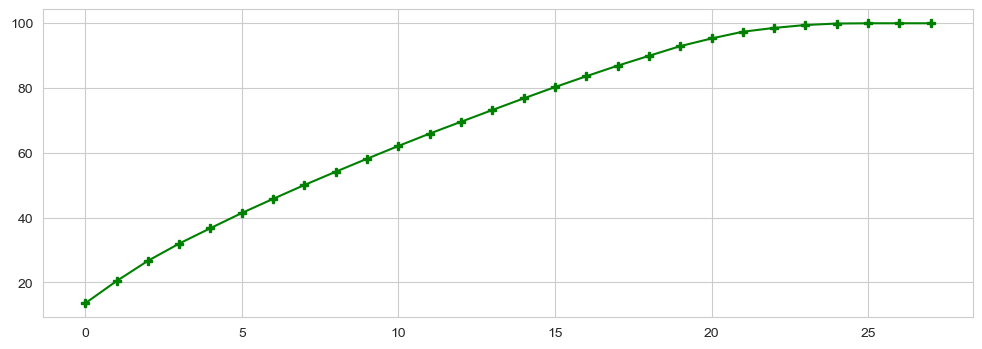

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");

In [ ]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
 'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
 'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
 'pc22','pc23','pc24']),
 forest[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    3.766709 -1.320255 -0.843971 -1.994738 -1.453359  0.693985  0.308104   
1    0.390786  0.831062 -1.101365  1.400671  2.869388  0.965898 -2.795574   
2    0.690416  1.177746 -1.221998  2.442038  1.090630  0.390801 -1.586675   
3    3.359951 -1.161443  0.385728 -2.118328 -1.949601  1.027664 -0.179422   
4    2.974329 -0.842626  1.327788  0.038086 -1.124763 -0.574676 -0.777155   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.087560  0.153964  1.241810  1.536581  0.372425 -1.133422 -0.362287   
513  0.794366 -0.083966  2.670485  0.284995  0.223323 -0.904232 -0.014849   
514  0.921634 -0.264543  2.719216 -0.019643  0.242195 -0.966939 -0.118080   
515 -1.620549 -0.978838  0.331987  1.256638 -0.408164  0.735698  0.815510   
516  4.075907 -0.367441 -0.247152  0.979966  6.792273  5.943666 -1.639583   

          pc8       pc9      pc10  ...       pc16      pc17      pc18  \
0   -0.019764  0.010161 -0.437314  ...  -0.197543 -0.021839  0.688958   
1    0.041095 -0.548879  0.104500  ...  -2.503167  0.499649  0.563706   
2   -2.159336 -0.090580  0.260888  ...  -2.545144 -0.658411 -0.423618   
3   -0.250227 -0.620329 -1.343189  ...  -0.040887  0.017843  0.332572   
4    0.303635  0.861126 -2.024719  ...   0.844431  1.014944 -0.618231   
..        ...       ...       ...  ...        ...       ...       ...   
512  0.766946  0.818745 -0.289632  ...   0.300522  0.513876  0.539642   
513  0.107226  1.340049 -0.147246  ...   0.342367  0.485571  0.580150   
514  0.123010  1.290364 -0.177553  ...   0.332816  0.344047  0.122409   
515 -1.398344  0.076379 -0.005814  ...  -0.011739 -1.035533 -0.774382   
516  8.121827 -0.627980  4.953722  ...  10.467443 -7.333036  0.377340   

         pc19      pc20      pc21      pc22      pc23      pc24  size_category  
0    0.563603 -0.439596 -0.926619 -0.405425 -0.118719 -0.017933              0  
1   -0.703319 -1.535718 -0.892995  0.836590  0.204975  0.290771              0  
2    0.860550 -1.195230 -0.297870  0.743648  0.081757  0.345915              0  
3    1.164745 -1.632741 -0.817618  1.523710 -0.342302 -0.378420              0  
4    0.822853 -1.794109 -0.723371  2.020419 -0.545591  0.161735              0  
..        ...       ...       ...       ...       ...       ...            ...  
512 -0.052958  1.898628 -1.441786 -0.821192 -1.205707 -0.698666              1  
513  0.384984  0.086251 -0.970693 -1.353365 -1.254890 -1.212175              1  
514  0.313948  0.211157 -0.777731 -1.736711 -1.154127 -1.230040              1  
515 -0.216315  0.515791  0.080575 -0.055548 -0.067502 -0.311027              0  
516  8.870354 -1.074288  2.382433  1.042850  0.296436  0.125099              0  

[517 rows x 25 columns]

<AxesSubplot:>

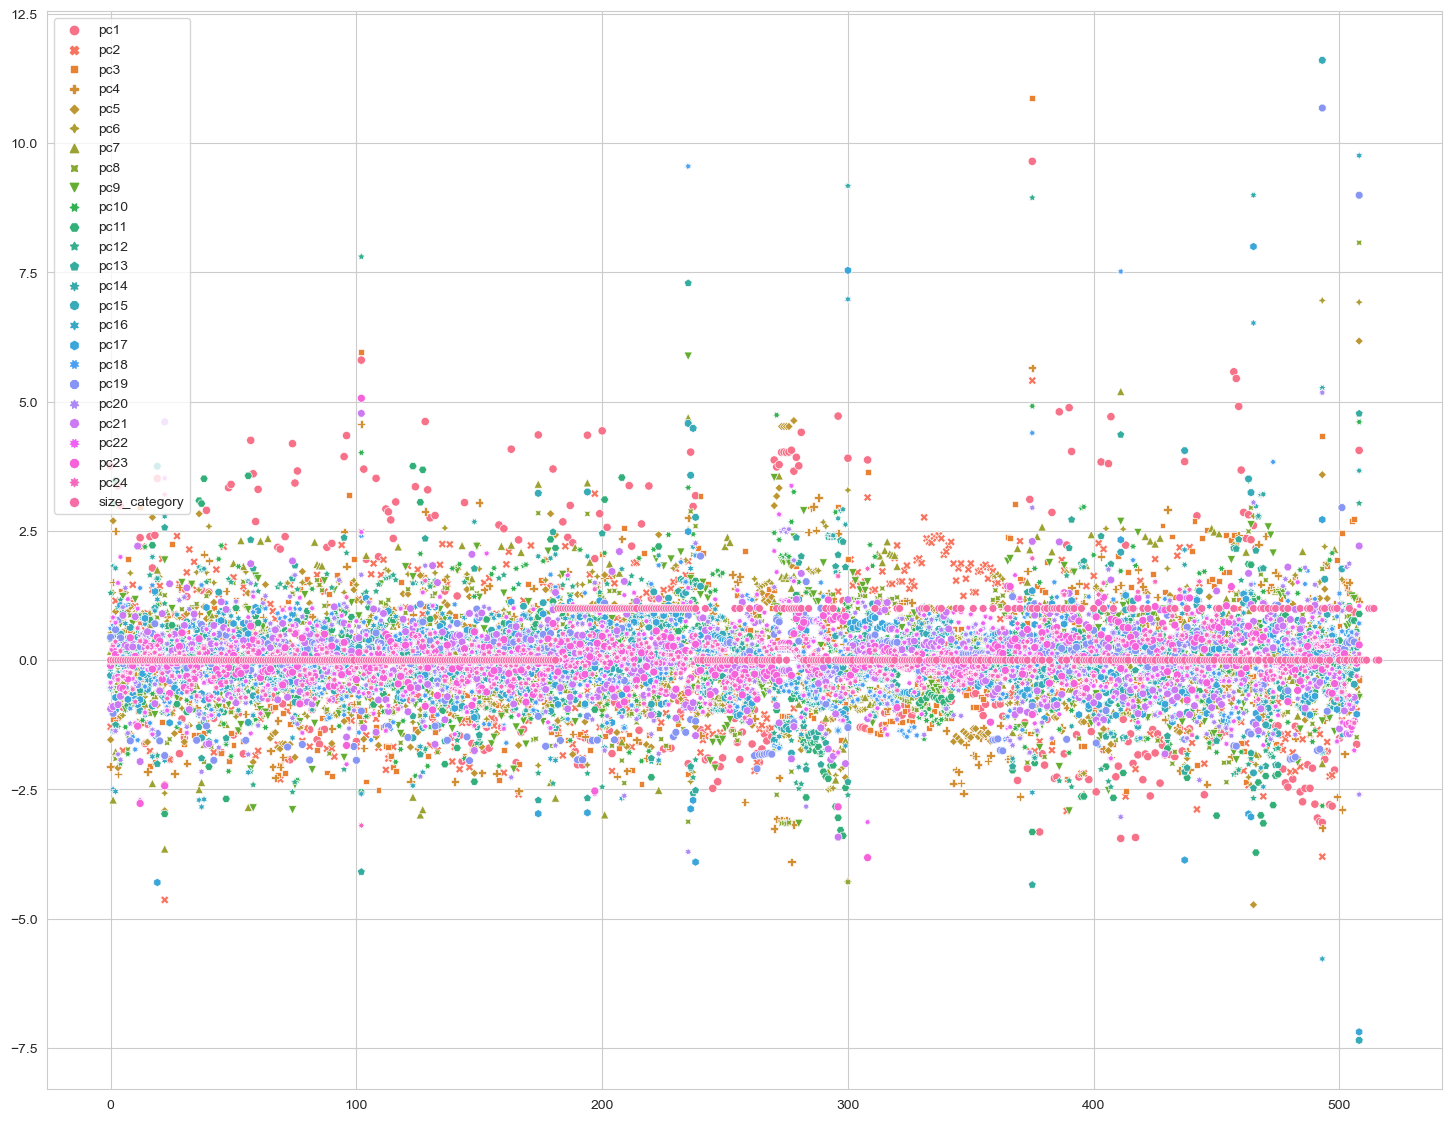

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(18,14))
sns.scatterplot(data=finalDf)

In [ ]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 8s 82ms/step - loss: 0.7231 - accuracy: 0.5208 - val_loss: 0.7114 - val_accuracy: 0.5064
Epoch 2/150
37/37 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.6343 - val_loss: 0.6849 - val_accuracy: 0.5897
Epoch 3/150
37/37 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.7230 - val_loss: 0.6686 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.7590 - val_loss: 0.6610 - val_accuracy: 0.6603
Epoch 5/150
37/37 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7618 - val_loss: 0.6573 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7618 - val_loss: 0.6545 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 5ms/step - loss: 0.5284 - accuracy: 0.7618 - val_loss: 0.6547 - val_accuracy: 0.6795
Epoch 8/150


Epoch 59/150
37/37 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9141 - val_loss: 0.7814 - val_accuracy: 0.7372
Epoch 60/150
37/37 [==============================] - 0s 4ms/step - loss: 0.2042 - accuracy: 0.9252 - val_loss: 0.7830 - val_accuracy: 0.7372
Epoch 61/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1977 - accuracy: 0.9280 - val_loss: 0.7848 - val_accuracy: 0.7308
Epoch 62/150
37/37 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9252 - val_loss: 0.7817 - val_accuracy: 0.7308
Epoch 63/150
37/37 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9141 - val_loss: 0.7915 - val_accuracy: 0.7372
Epoch 64/150
37/37 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9224 - val_loss: 0.7835 - val_accuracy: 0.7372
Epoch 65/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9335 - val_loss: 0.7870 - val_accuracy: 0.7564
Epoch 

37/37 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9668 - val_loss: 0.9154 - val_accuracy: 0.7692
Epoch 117/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9751 - val_loss: 0.9169 - val_accuracy: 0.7692
Epoch 118/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9751 - val_loss: 0.9174 - val_accuracy: 0.7821
Epoch 119/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9751 - val_loss: 0.9149 - val_accuracy: 0.7756
Epoch 120/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9806 - val_loss: 0.9241 - val_accuracy: 0.7692
Epoch 121/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9751 - val_loss: 0.9274 - val_accuracy: 0.7756
Epoch 122/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9778 - val_loss: 0.9344 - val_accuracy: 0.7756
Epoch 123/150

In [ ]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.9304
accuracy: 93.04%
